# Predictive Modeling

In [13]:
#import necessary libraries
import numpy as np
import pandas as pd

In [14]:
#load the dataset
df= pd.read_csv("C:/Users/manag/Cognifyz Projects/Restaurant.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [15]:
#drop rows with missing values
df =df.dropna()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score

#target variable and input features
X = df[["City","Cuisines","Average Cost for two", "Has Table booking", "Has Online delivery", "Is delivering now", "Price range", "Votes"]].copy()
y=df[["Aggregate rating"]].copy()

In [35]:
#encoding categorical data using OneHotEncoder 
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(df[['City', 'Cuisines']])

#convert the encoded data into a DataFrame and append to the original DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['City', 'Cuisines']))

#drop the original categorical columns and concatenate the encoded columns
X_encoded = X.drop(columns=['City', 'Cuisines']).reset_index(drop=True)
X_encoded = pd.concat([X_encoded, encoded_df], axis=1)

print(X_encoded)

      Average Cost for two  Has Table booking  Has Online delivery  \
0                     1100                  1                    0   
1                     1200                  1                    0   
2                     4000                  1                    0   
3                     1500                  0                    0   
4                     1500                  1                    0   
...                    ...                ...                  ...   
9537                    80                  0                    0   
9538                   105                  0                    0   
9539                   170                  0                    0   
9540                   120                  0                    0   
9541                    55                  0                    0   

      Is delivering now  Price range  Votes  City_Abu Dhabi  City_Agra  \
0                     0            3    314             0.0        0.0   
1          

In [38]:
#encoding categorical data using LabelEncoder 
le = LabelEncoder()
X_encoded["Has Table booking"] = le.fit_transform(X_encoded["Has Table booking"])
X_encoded["Has Online delivery"] = le.fit_transform(X_encoded["Has Online delivery"])
X_encoded["Is delivering now"] = le.fit_transform(X_encoded["Is delivering now"])
print(X_encoded)

      Average Cost for two  Has Table booking  Has Online delivery  \
0                     1100                  1                    0   
1                     1200                  1                    0   
2                     4000                  1                    0   
3                     1500                  0                    0   
4                     1500                  1                    0   
...                    ...                ...                  ...   
9537                    80                  0                    0   
9538                   105                  0                    0   
9539                   170                  0                    0   
9540                   120                  0                    0   
9541                    55                  0                    0   

      Is delivering now  Price range  Votes  City_Abu Dhabi  City_Agra  \
0                     0            3    314             0.0        0.0   
1          

In [39]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [40]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
#prediction
y_pred = regressor.predict(X_test)

In [42]:
#models performance
score = r2_score(y_test,y_pred)
print("r2 Score:", score)

r2 Score: 0.34134558564345496


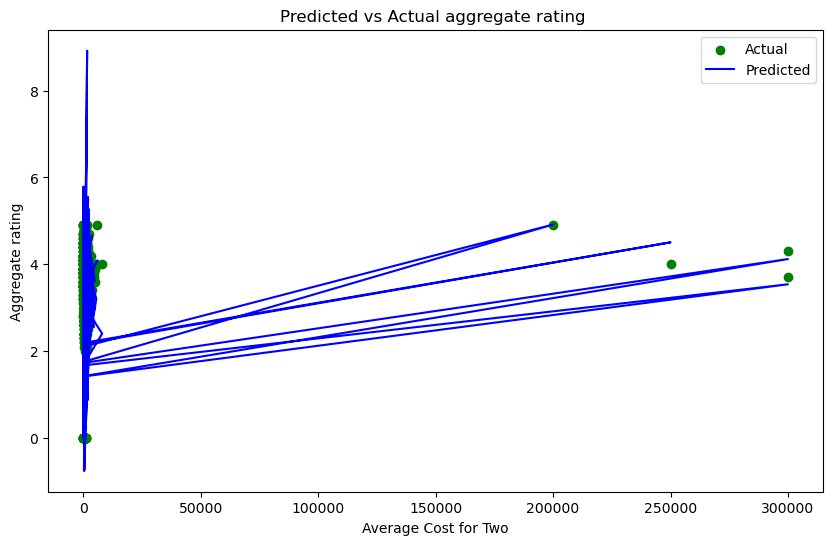

In [58]:
#visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test["Average Cost for two"], y_test, color= 'green', label='Actual')
plt.plot(X_test["Average Cost for two"],y_pred, color='blue', label='Predicted')
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate rating")
plt.title("Predicted vs Actual aggregate rating ")
plt.legend()
plt.show()

In [72]:
#Decision Tree and Random Forest 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

In [81]:
#fit the model
regressor2 = DecisionTreeRegressor()
regressor2.fit(X_train, y_train)

DecisionTreeRegressor()

In [82]:
#prediction
y_pred2 = regressor2.predict(X_test)

In [85]:
#models performance
mse = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error:", mse)
score2 = r2_score(y_test,y_pred2)
print("r2 Score:", score2)

Mean Squared Error: 0.16609426837785926
r2 Score: 0.9274707716794421


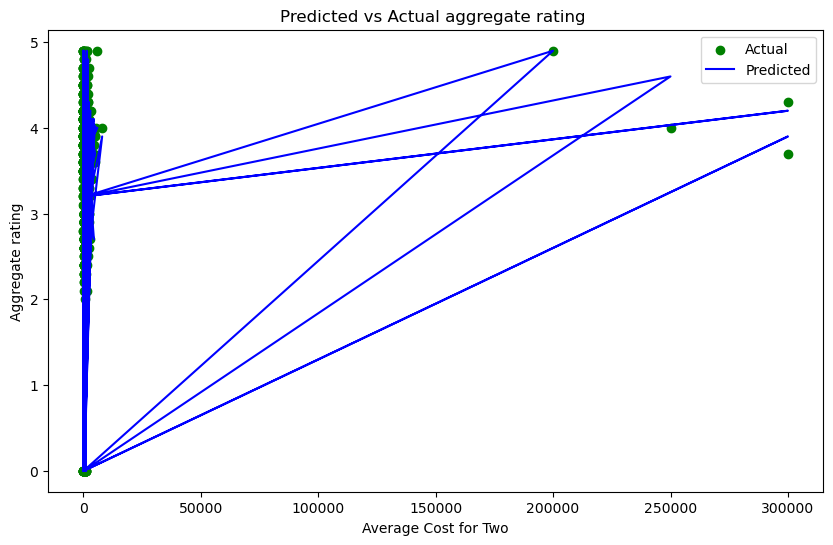

In [86]:
#visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test["Average Cost for two"], y_test, color= 'green', label='Actual')
plt.plot(X_test["Average Cost for two"],y_pred2, color='blue', label='Predicted')
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate rating")
plt.title("Predicted vs Actual aggregate rating ")
plt.legend()
plt.show()

In [89]:
#fit the model
regressor3 = RandomForestRegressor()
regressor3.fit(X_train, y_train.values.ravel())

RandomForestRegressor()

In [93]:
#prediction
y_pred3 = regressor3.predict(X_test)

In [94]:
#models performance
mse3 = mean_squared_error(y_test, y_pred3)
print("Mean Squared Error:", mse3)
score3 = r2_score(y_test,y_pred3)
print("r2 Score:", score3)

Mean Squared Error: 0.10273179216937335
r2 Score: 0.9551395861952223


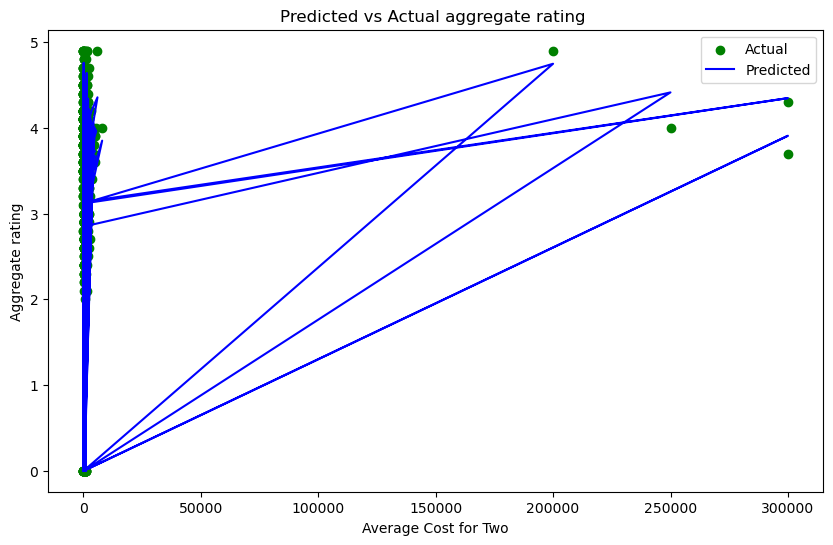

In [95]:
#visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test["Average Cost for two"], y_test, color= 'green', label='Actual')
plt.plot(X_test["Average Cost for two"],y_pred3, color='blue', label='Predicted')
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate rating")
plt.title("Predicted vs Actual aggregate rating ")
plt.legend()
plt.show()